In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CSS_PATH = Path("data", "wandb_base_model_sweep.csv")
CSS_2_PATH = Path("data", "wandb_idk.csv")

In [18]:
df = pd.read_csv(CSS_PATH)
# df.head()
print(len(df))
# df = df[["transformer_model", "test_score"]]
# df.loc[df["test_score"] < 0.01]

# extra runs to offset fails
additional_runs = [
    ["upbeat-brook-1027", 123, "roberta-base", 0.5869],
    ["glamorous-water-1026", 123, "roberta-base", 0.5557],
    ["sage-darkness-1025", 123, "distilbert-base-uncased", 0.5913]
]

for run in additional_runs:
    df.loc[len(df)] = run

print(len(df))

45
48


In [19]:
df = df[["transformer_model", "test_score"]]
df = df.loc[df["test_score"] > 0.01]
df = df.sort_values(by=["transformer_model"]).reset_index(drop=True)
df

,transformer_model,test_score
0,bert-base-uncased,0.461976
1,bert-base-uncased,0.573474
2,bert-base-uncased,0.623477
3,bert-base-uncased,0.479373
4,bert-base-uncased,0.555865
5,bert-base-uncased,0.587379
6,bert-base-uncased,0.448296
7,bert-base-uncased,0.456328
8,bert-base-uncased,0.659809
9,bert-base-uncased,0.499565


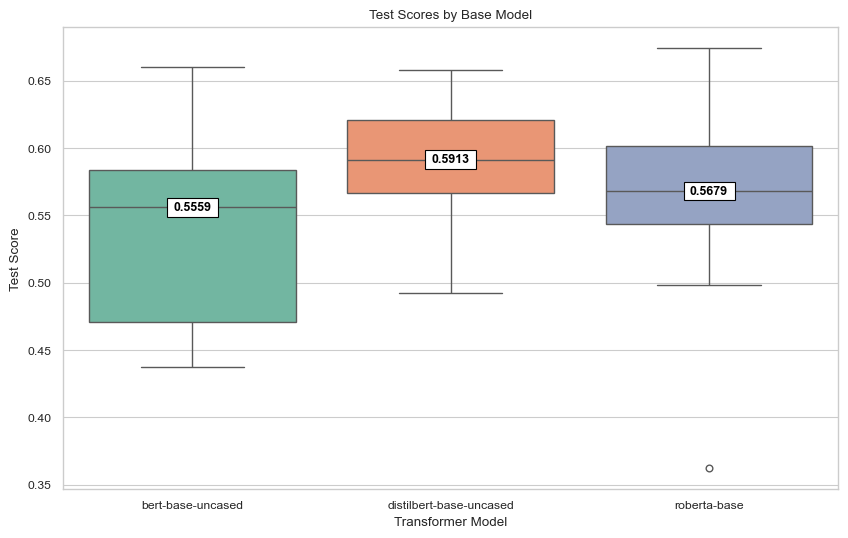

In [20]:
X_SIZE = 10
Y_SIZE = 6

plt.figure(figsize=(X_SIZE, Y_SIZE))

box_plot = sns.boxplot(
    data=df, 
    x='transformer_model', 
    y='test_score', 
    hue='transformer_model'
)

plt.title('Test Scores by Base Model')
plt.xlabel('Transformer Model')
plt.ylabel('Test Score')

medians = df.groupby(['transformer_model'])['test_score'].median()

# Get the current axis
ax = plt.gca()

# Calculate the vertical offset based on the plot size
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
vertical_offset = y_range * 0.01 

x_margin = X_SIZE = 0.025
y_margin = Y_SIZE = 0.0025

for xtick in box_plot.get_xticks():
    median = medians.iloc[xtick]
    text = ax.text(
        xtick, 
        median,
        f'{median:.4f}', 
        horizontalalignment='center',
        verticalalignment='center',
        size=9,
        color='black',
        weight='semibold'
    )
    
    # Get the bounding box of the text
    bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
    
    # Convert bbox to data coordinates
    bbox_data = bbox.transformed(ax.transData.inverted())
    
    rect = plt.Rectangle((bbox_data.x0 - x_margin, bbox_data.y0 - y_margin), 
                         bbox_data.width + 2*x_margin, 
                         bbox_data.height + 2*y_margin, 
                         facecolor='white', 
                         edgecolor='black', 
                         # alpha=0.7, 
                         zorder=3)
    
    ax.add_patch(rect)
    
    # Bring the text to the front
    text.set_zorder(4)

save_path = Path(os.getcwd(), "output_figs", "base_model_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [21]:
# Group the DataFrame by 'dataset' and calculate statistics for 'test_score'
stats = df.groupby('transformer_model')['test_score'].agg(['max', 'min', 'median', 'mean', 'std'])

# Rename the columns for clarity
stats.columns = ['Highest', "Lowest", 'Median', 'Mean', 'Standard Deviation']

# Round the results to 4 decimal places
stats = stats.round(4)
stats.index = stats.index.rename("Transformer Model")
stats

,Highest,Lowest,Median,Mean,Standard Deviation
Transformer Model,,,,,
bert-base-uncased,0.6598,0.4371,0.5559,0.5370,0.0696
distilbert-base-uncased,0.6578,0.4925,0.5913,0.5846,0.0509
roberta-base,0.6742,0.3623,0.5679,0.5657,0.0725


In [22]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_second_max(s, props=''):
    return np.where(s == np.sort(s.values)[-2], props, '')

styled_stats = stats.style.format(precision=4)
styled_stats = styled_stats.apply(highlight_max, props="textbf:--rwrap;", subset=stats.columns[0:-1], axis=0)
styled_stats = styled_stats.apply(highlight_second_max, props="ul:--rwrap;", subset=stats.columns[0:-1], axis=0)
print(styled_stats.to_latex())

\begin{tabular}{lrrrrr}
 & Highest & Lowest & Median & Mean & Standard Deviation \\
Transformer Model &  &  &  &  &  \\
bert-base-uncased & \ul{0.6598} & \ul{0.4371} & 0.5559 & 0.5370 & 0.0696 \\
distilbert-base-uncased & 0.6578 & \textbf{0.4925} & \textbf{0.5913} & \textbf{0.5846} & 0.0509 \\
roberta-base & \textbf{0.6742} & 0.3623 & \ul{0.5679} & \ul{0.5657} & 0.0725 \\
\end{tabular}

